Amazon Review

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from wordcloud import WordCloud
import nltk
nltk.download(["stopwords",
               "punkt",
               "wordnet",
               "omw-1.4",
               "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")
print(stop_words[:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ["cacti", "sings", "hopped", "rocks", "better", "easily"]
pos = ["n","v", "v", "n", "a" , "r"]
lemmatized_words = [lemmatizer.lemmatize(words[i], pos = pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]
print("Lemmatized words:", lemmatized_words)
print("Stemmed words:", stemmed_words)

Lemmatized words: ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words: ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
def preprocess_text(text):
  tokenized_doc = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\"]+").tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_doc if word.lower() not in stop_words]
  stemmed_words = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_words

In [ ]:
print(preprocess_text("This movie is great"))
print(preprocess_text("This movie is not great"))

['movi', 'great']
['movi', 'great']


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores("This movie is great"))
print(sentiment.polarity_scores("This movie is not great"))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [20]:
reviews = pd.read_csv("Reviews_of_Amazon_Products.csv")
reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack


In [21]:
reviews.describe()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
count,1123,1123,1123,1123,1123,1123,1123,1123
unique,2,7,1,2,237,1048,820,983
top,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-06T00:00:00.000Z,Good tablet. Gave as gift and person enjoys it...,Great tablet,John
freq,1016,797,1123,1112,48,3,56,5


In [22]:
reviews["compound"] = [sentiment.polarity_scores(review)["compound"] for review in reviews["reviews.text"]]
reviews["neg"] = [sentiment.polarity_scores(review)["neg"] for review in reviews["reviews.text"]]
reviews["neu"] = [sentiment.polarity_scores(review)["neu"] for review in reviews["reviews.text"]]
reviews["pos"] = [sentiment.polarity_scores(review)["pos"] for review in reviews["reviews.text"]]


In [23]:
reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue,0.7329,0.081,0.709,0.210
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,0.5826,0.000,0.744,0.256
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,0.3612,0.085,0.772,0.143
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,0.9727,0.000,0.843,0.157
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,0.9072,0.000,0.661,0.339


In [24]:
reviews[["compound", "neg", "neu", "pos"]].describe()

,compound,neg,neu,pos
count,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.623324,0.033545,0.694907,0.271563
std,0.347236,0.058432,0.147549,0.152466
min,-0.867400,0.000000,0.230000,0.000000
25%,0.493900,0.000000,0.592000,0.163000
50%,0.750600,0.000000,0.705000,0.259000
75%,0.865800,0.055500,0.800500,0.380000
max,0.999200,0.475000,1.000000,0.689000


<Axes: xlabel='compound', ylabel='Count'>

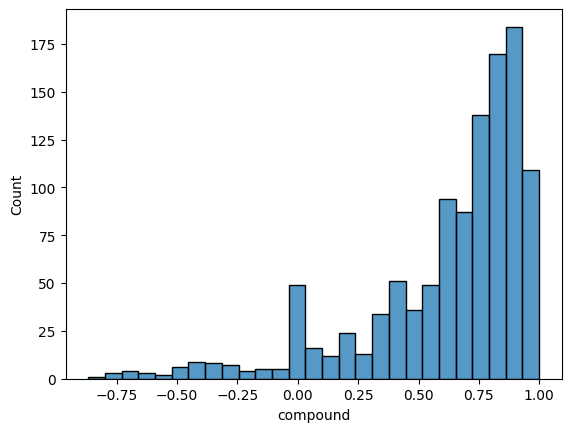

In [25]:
sns.histplot(reviews["compound"])

<Axes: xlabel='neg', ylabel='Count'>

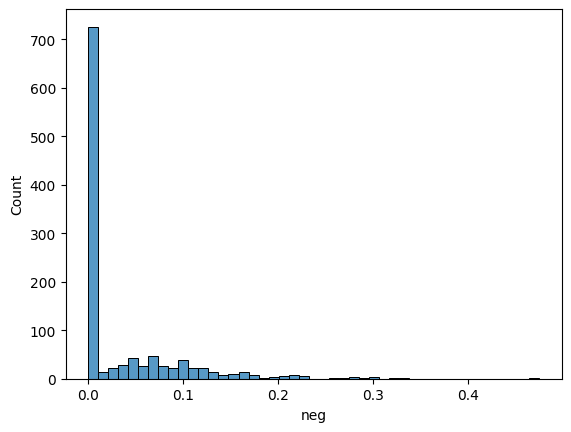

In [26]:
sns.histplot(reviews["neg"])

<Axes: xlabel='neu', ylabel='Count'>

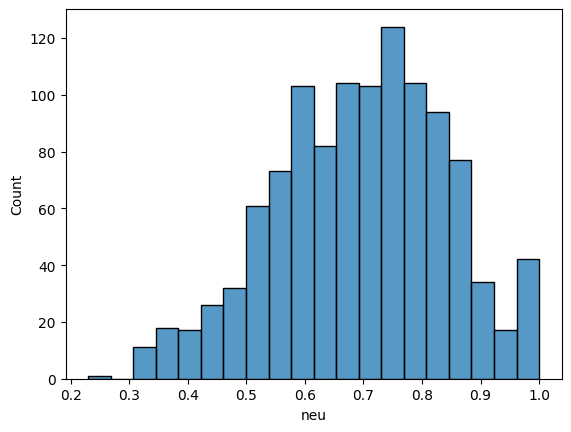

In [27]:
sns.histplot(reviews["neu"])

<Axes: xlabel='pos', ylabel='Count'>

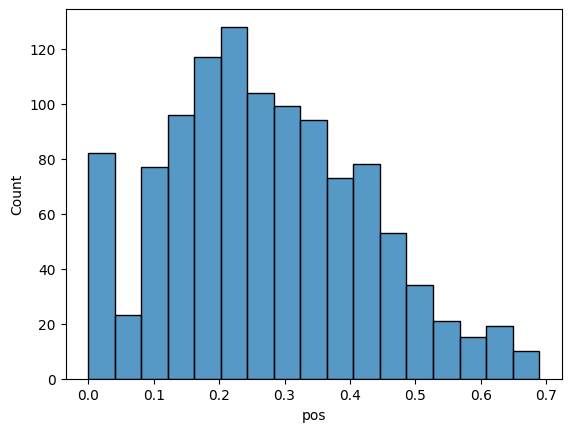

In [28]:
sns.histplot(reviews["pos"])

In [32]:
(reviews["compound"]<=0).groupby(reviews["name"]).sum()

,compound
name,
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",67
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",5
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",5
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",10
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",1


In [34]:
percent_negative = pd.DataFrame((reviews["compound"]<=0).groupby(reviews["name"]).sum()/reviews["name"].groupby(reviews["name"]).count()*100,
                                columns = ["% negative reviews"]).sort_values(by = "% negative reviews")
percent_negative

,% negative reviews
name,
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1.960784
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",8.406524
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",8.620690
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",9.090909
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",12.500000
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",14.285714


<Axes: xlabel='% negative reviews', ylabel='name'>

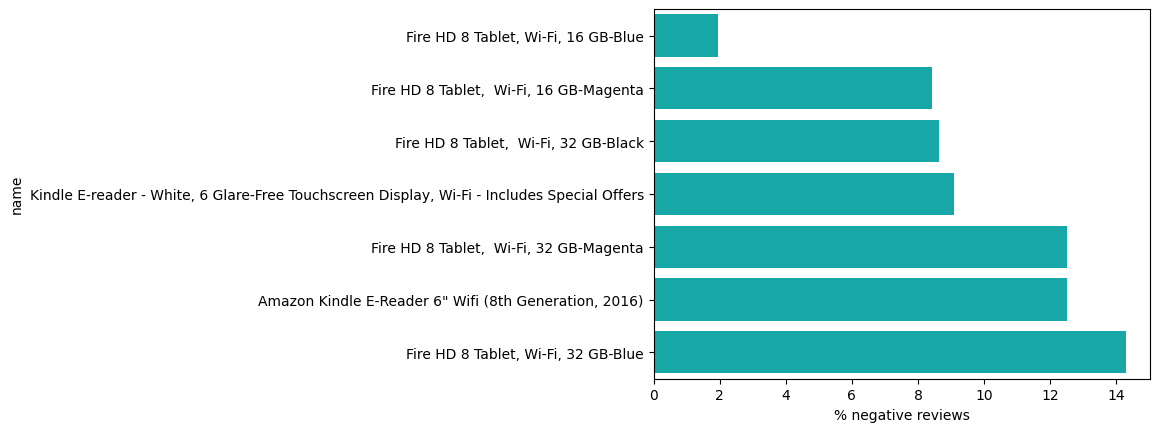

In [35]:
sns.barplot(data=percent_negative, x="% negative reviews", y = percent_negative.index, color="c")

In [38]:
reviews["processed_review"] = reviews["reviews.text"].apply(preprocess_text)
product_to_analyze = "Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue"
reviews_positive_subset = reviews.loc[(reviews["name"] == product_to_analyze) & (reviews["compound"] >= 0),:]
reviews_negative_subset = reviews.loc[(reviews["name"] == product_to_analyze) & (reviews["compound"] < 0),:]
reviews_positive_subset.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos,processed_review
109,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-02-11T00:00:00.000Z,Bought this mostly as a backup.and to read a f...,"less than 120 days, about 100 use. It is toast!",PatF,0.0772,0.027,0.951,0.022,"[bought, mostli, backup, read, book, sinc, lar..."
110,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-03-10T00:00:00.000Z,Love my new Kindle fire. This replaces my old ...,Awesome tablet,Azjeff4545,0.9231,0.050,0.603,0.347,"[love, new, kindl, fire, replac, old, one, goo..."
112,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-02-04T00:00:00.000Z,Purchased this tablet for a gift..They love it...,Nice tablet,Collins,0.7964,0.000,0.530,0.470,"[purchas, tablet, gift, love, easi, use]"
113,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-05-17T00:00:00.000Z,I had one of the first Kindle fires for years ...,Great tablet,Smroward,0.9041,0.000,0.641,0.359,"[one, first, kindl, fire, year, love, want, an..."
114,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-01-16T00:00:00.000Z,This is my second kindle. Have a few more item...,Love my kindle,Dqueen,0.8922,0.000,0.651,0.349,"[second, kindl, item, learn, love, easi, get, ..."


Wordcloud of words from negative reviews by product

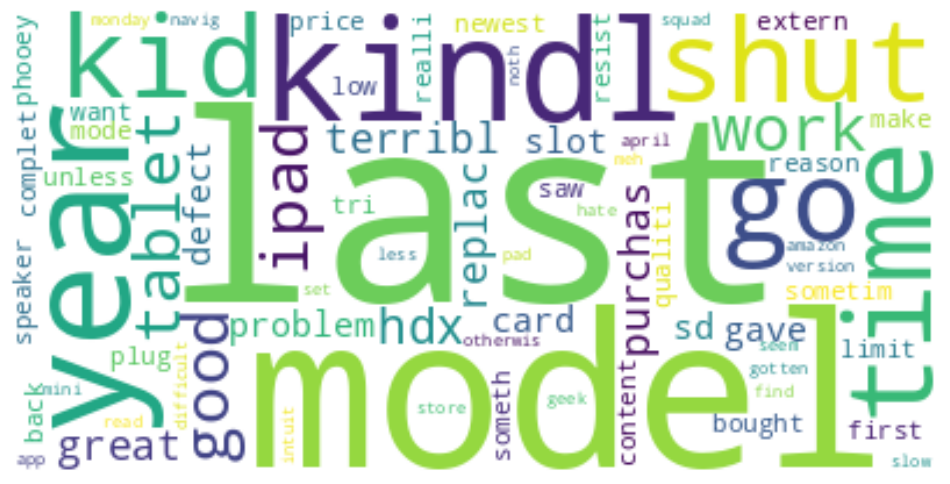

In [39]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(" ".join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

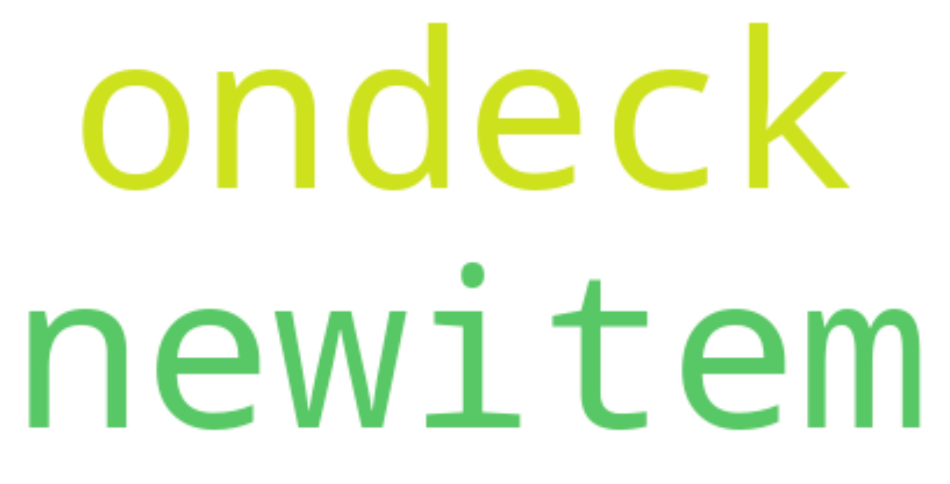

In [40]:
# Wordcloud of words from positive reviews by product

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text("".join(pos_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   use    app   love  kindl tablet  devic amazon    one screen   fire 
    42     38     34     33     30     29     27     25     23     19 


In [42]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

 last model     2 kindl  year     8  time  shut    go   kid 
    4     4     3     3     3     2     2     2     2     2 


<Axes: xlabel='Samples', ylabel='Counts'>

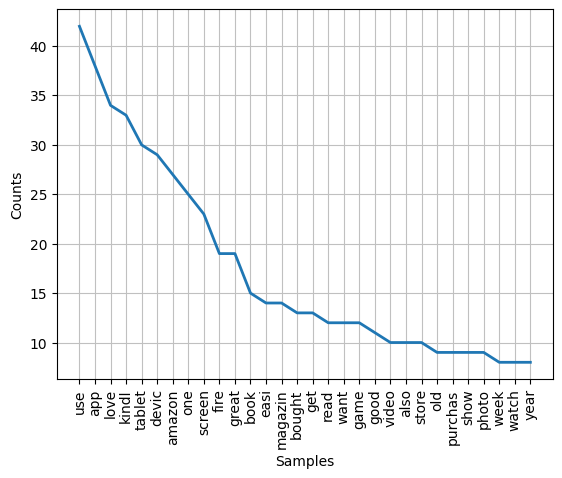

In [43]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

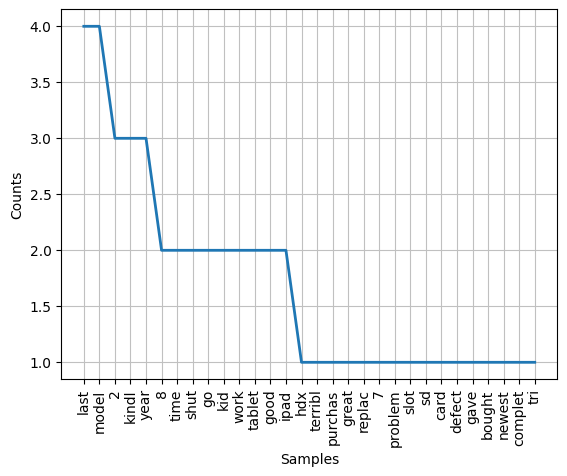

In [44]:
neg_freqdist.plot(30)